## ASSIGNMENT 1 - Regression Analysis

### Regression Analysis - Housing Price Prediction

#### Problem Statement :

#### Apply various Regression Models for the House Price Prediction which will predict the price of the houses in future depending on the parameters.



#### Installation of required libraries

In [1]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")


#### Load the data set

In [2]:
data=pd.read_csv(r"C:\Users\Uma\Downloads\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Data preprocessing

In [3]:
data.shape

(21613, 21)

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Exploratory Data Analysis (EDA)

In [8]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S', errors='coerce')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Summary statistics of numerical columns
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


### Data Visulization

In [10]:
data['floors'].value_counts()


floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

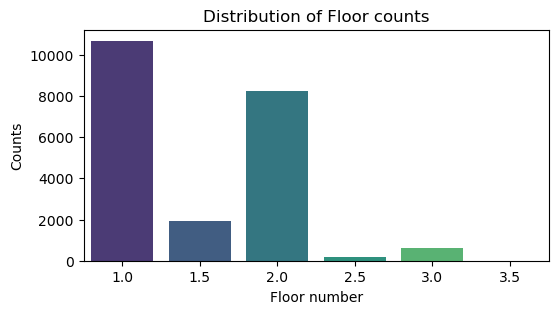

In [11]:
plt.figure(figsize=(6,3))
sns.countplot(x=data['floors'],palette="viridis")
plt.xlabel("Floor number")
plt.ylabel("Counts")
plt.title("Distribution of Floor counts")
plt.show()

Text(0.5, 1.0, 'Distribution of bothrooms')

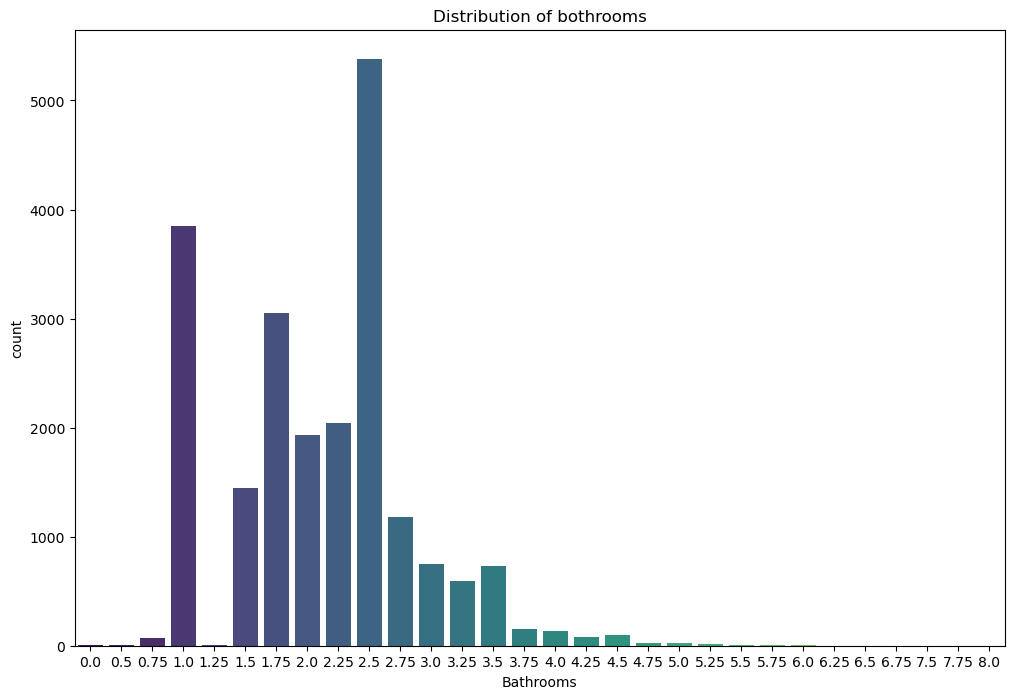

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['bathrooms'],palette="viridis")
plt.xlabel('Bathrooms')
plt.ylabel('count')
plt.title("Distribution of bothrooms")

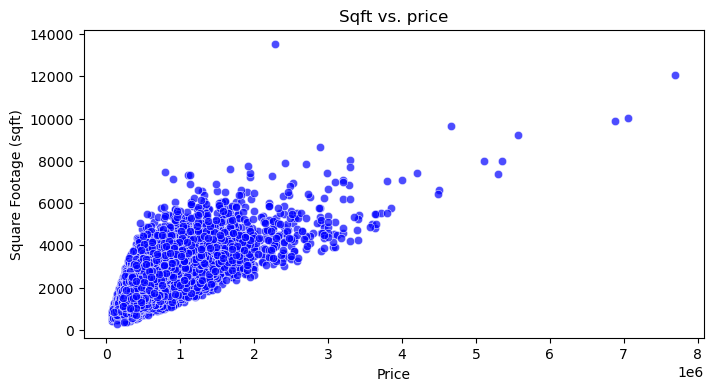

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data["price"], y=data["sqft_living"], alpha=0.7, color="blue")
plt.xlabel("Price")
plt.ylabel("Square Footage (sqft)")
plt.title("Sqft vs. price")
plt.show()

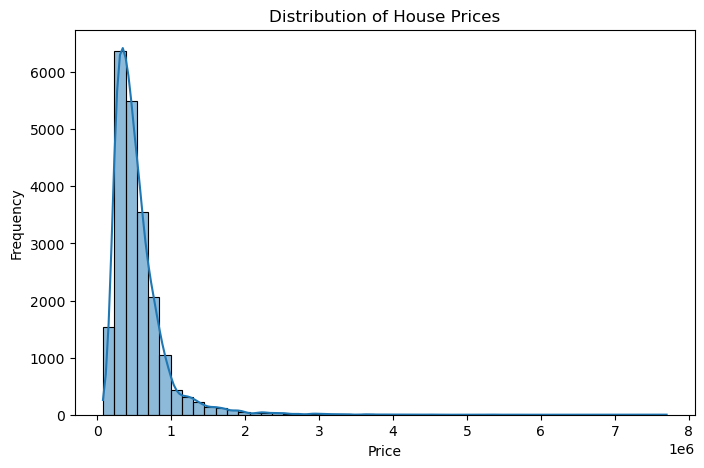

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

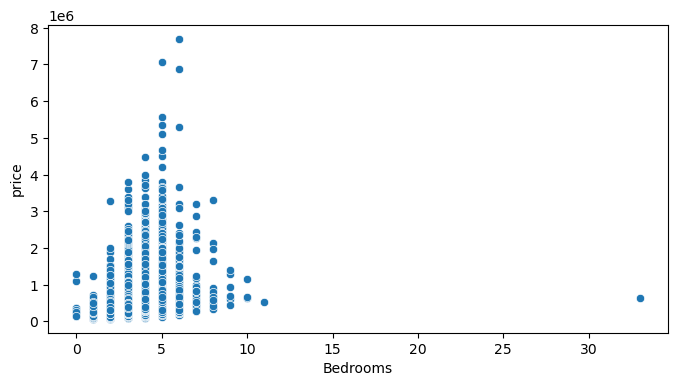

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['bedrooms'],y=data['price'])
plt.xlabel("Bedrooms")
plt.ylabel("price")
plt.show()

<Figure size 1400x600 with 0 Axes>

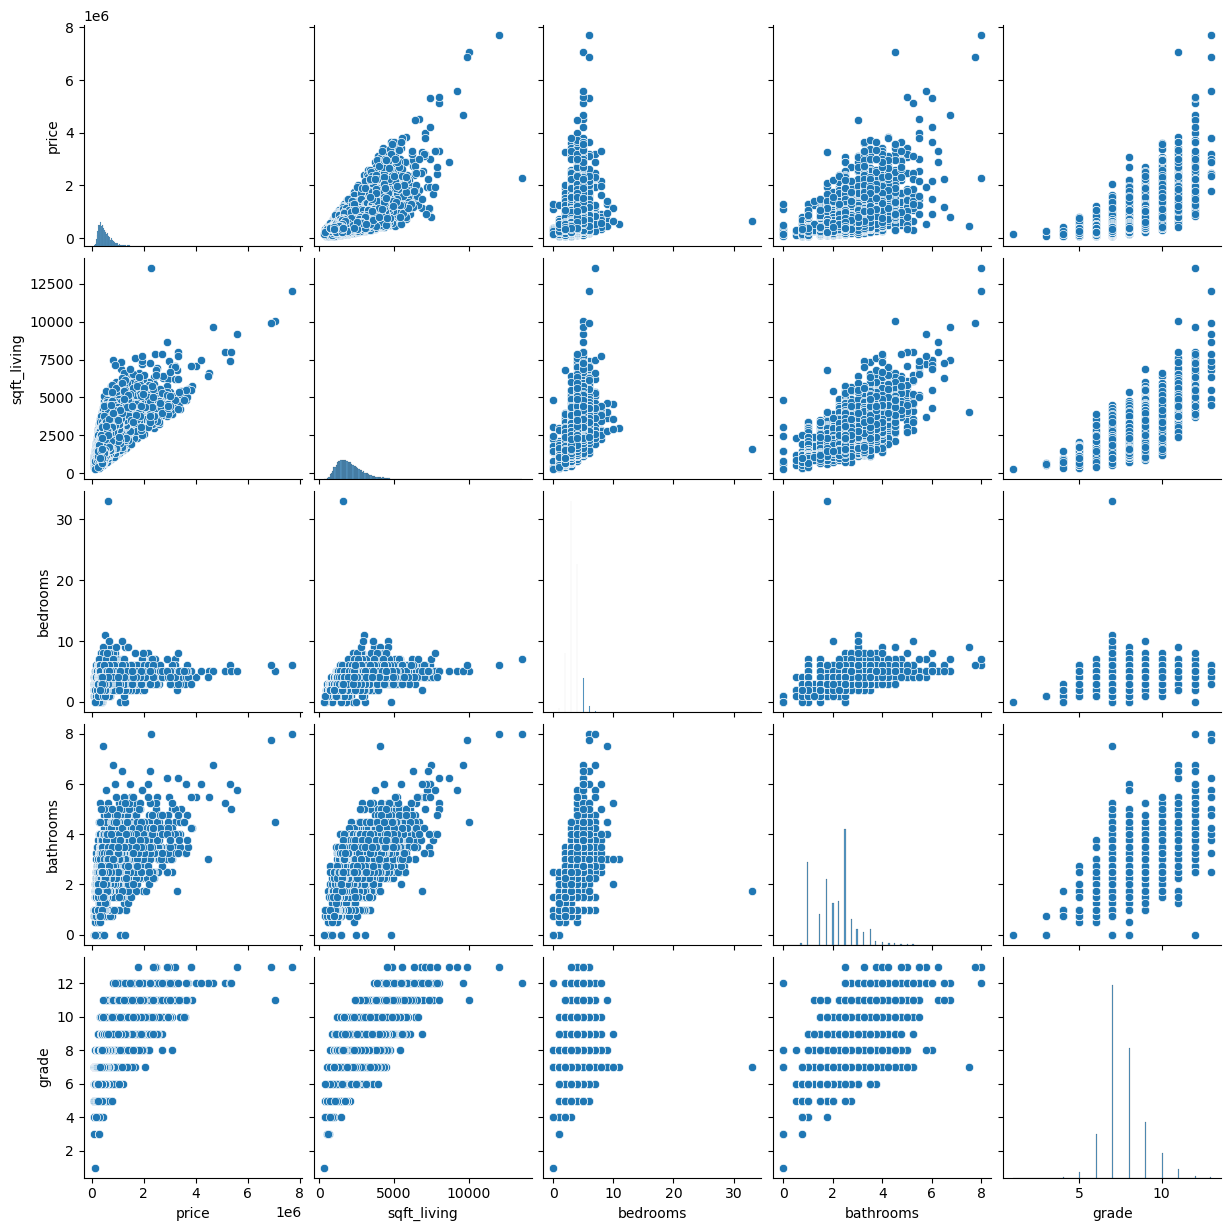

In [16]:
plt.figure(figsize=(14, 6))
sns.pairplot(data, vars=['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade'])
plt.show()


In [17]:
data.drop(columns=['id'], inplace=True)  # Drop 'id' if present

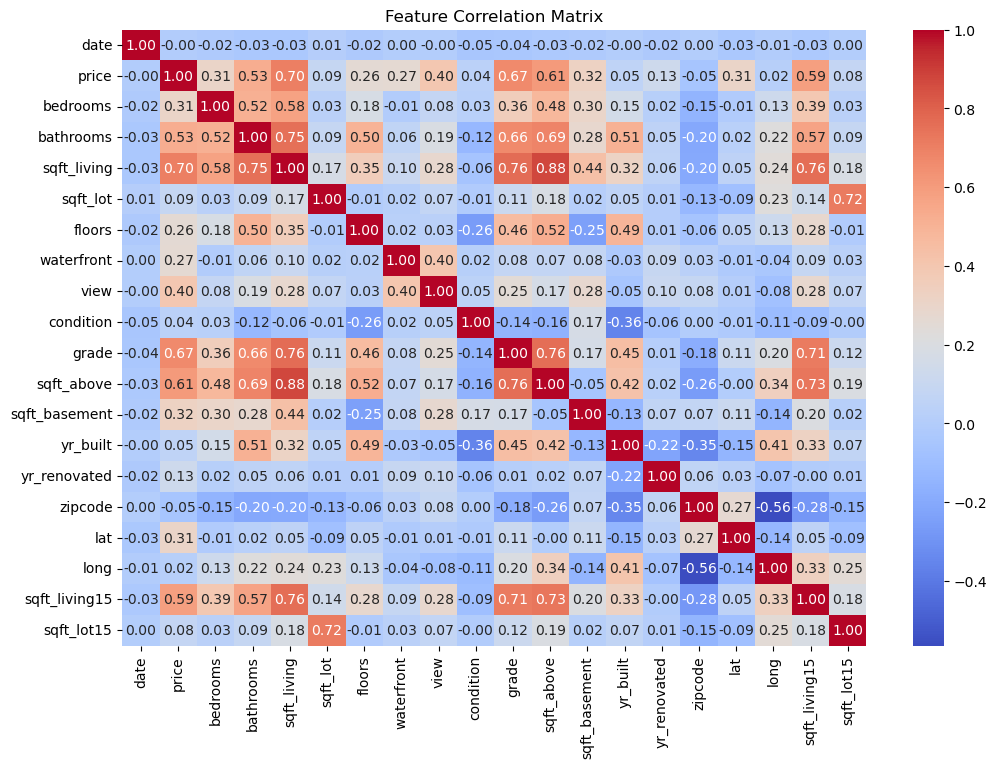

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
# Compute the correlation matrix
corr_matrix = data.corr()


- If two features are highly correlated (above 0.85), drop one of them to prevent redundancy.


In [20]:
# Find columns with correlation above 0.85
correlation_threshold = 0.85

# Get upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
highly_correlated_features = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

print("Highly Correlated Features to Drop:", highly_correlated_features)


Highly Correlated Features to Drop: ['sqft_above']


In [21]:
# Drop highly correlated features
data.drop(columns=highly_correlated_features, inplace=True)

# Check new shape of the dataset

print("Updated dataset shape:", data.shape)


Updated dataset shape: (21613, 19)


In [22]:
# Check data types of all columns
print(data.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


-date is not in numeric column and Since we're not using it, let's drop it

In [23]:
data.drop(columns=['date'], inplace=True)

-since  all columns are numeric, then no encoding is needed,  I you can proceed with training.

## Split data into traing and testing

In [24]:
# Define target variable (y) and features (X)
X = data.drop(columns=['price'])  # Features (excluding target)
y = data['price']  # Target variable

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (17290, 17)
Testing Data Shape: (4323, 17)


### Traing models 

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)  # Train the model
y_pred_lr = lr.predict(X_test)  # Predict on test data

# Compute evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Model: LinearRegression")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")
print("-" * 40)


Model: LinearRegression
MAE: 127493.34
MSE: 45173046132.79
RMSE: 212539.52
R² Score: 0.7012
----------------------------------------


In [26]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Model: Ridge Regression")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}")
print("-" * 40)


Model: Ridge Regression
MAE: 127487.59
MSE: 45185052438.43
RMSE: 212567.76
R² Score: 0.7011
----------------------------------------


In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Model: Lasso Regression")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")
print("-" * 40)


Model: Lasso Regression
MAE: 127493.30
MSE: 45173095427.32
RMSE: 212539.63
R² Score: 0.7012
----------------------------------------


In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Model: Decision Tree Regressor")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")
print("-" * 40)


Model: Decision Tree Regressor
MAE: 103024.20
MSE: 44643902072.79
RMSE: 211291.04
R² Score: 0.7047
----------------------------------------


In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Model: Random Forest Regressor")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")
print("-" * 40)


Model: Random Forest Regressor
MAE: 72557.33
MSE: 22391235612.74
RMSE: 149637.01
R² Score: 0.8519
----------------------------------------


In [30]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Model: Gradient Boosting Regressor")
print(f"MAE: {mae_gbr:.2f}")
print(f"MSE: {mse_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.4f}")
print("-" * 40)


Model: Gradient Boosting Regressor
MAE: 81378.76
MSE: 22927171629.28
RMSE: 151417.21
R² Score: 0.8483
----------------------------------------


In [31]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Model: XGBoost Regressor")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")
print("-" * 40)


Model: XGBoost Regressor
MAE: 70491.17
MSE: 18211803033.04
RMSE: 134951.11
R² Score: 0.8795
----------------------------------------


### Compare Model Performance
-Let's store the R² scores of all models and compare them.

In [32]:
# Store model performance
model_performance = {
    "Linear Regression": r2_lr,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "Gradient Boosting": r2_gbr,
    "XGBoost": r2_xgb
}

# Sort models by R² Score (descending order)
sorted_models = sorted(model_performance.items(), key=lambda x: x[1], reverse=True)

print("\n Model Performance Comparison:")
for model, score in sorted_models:
    print(f"{model}: R² Score = {score:.4f}")


 Model Performance Comparison:
XGBoost: R² Score = 0.8795
Random Forest: R² Score = 0.8519
Gradient Boosting: R² Score = 0.8483
Decision Tree: R² Score = 0.7047
Linear Regression: R² Score = 0.7012
Lasso Regression: R² Score = 0.7012
Ridge Regression: R² Score = 0.7011


## Hyperparameter Tuning for XGBoost
-We'll use GridSearchCV to optimize XGBRegressor.

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1],  
    'colsample_bytree': [0.8, 1]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(" Best Hyperparameters:", grid_search.best_params_)


 Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [34]:

# Initialize XGBoost with best parameters
best_xgb = XGBRegressor(
    colsample_bytree=1, 
    learning_rate=0.1, 
    max_depth=5, 
    n_estimators=300, 
    subsample=0.8,
    random_state=42
)

# Train the model
best_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

# Print results
print("\nFinal Optimized Model: XGBoost Regressor")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")



Final Optimized Model: XGBoost Regressor
MAE: 69237.54
MSE: 20295237036.795
RMSE: 142461.35
R² Score: 0.8658


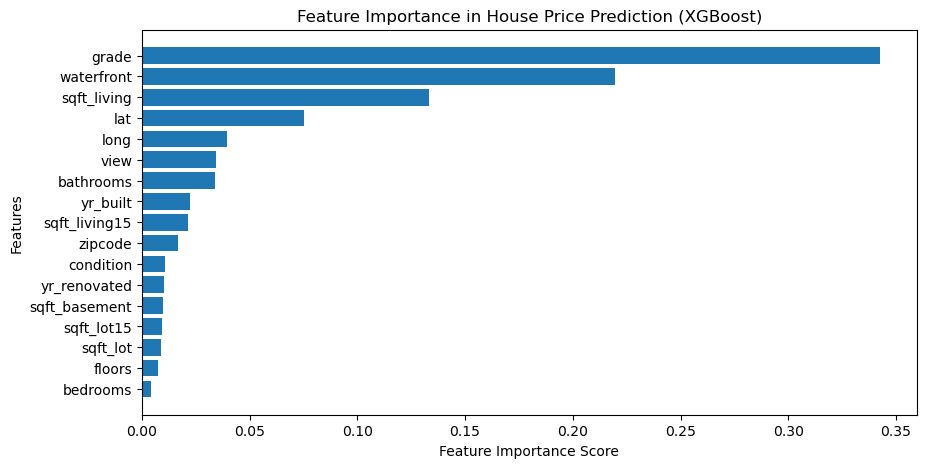

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = best_xgb.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in House Price Prediction (XGBoost)")
plt.gca().invert_yaxis()
plt.show()


### Predict Prices for New Data

In [36]:
# Example new data (replace with real data)
new_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [2000],
    'sqft_lot': [5000],
    'floors': [1],
    'waterfront': [0],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'sqft_basement': [500],
    'yr_built': [1995],
    'yr_renovated': [0],
    'zipcode': [98052],
    'lat': [47.6205],
    'long': [-122.3493],
    'sqft_living15': [1800],
    'sqft_lot15': [4000]
})

# Predict price
predicted_price = best_xgb.predict(new_data)
print(f"\nPredicted House Price:{predicted_price[0]}")



Predicted House Price:657360.125


In [37]:
# Example new data (replace with real data)
new_data = pd.DataFrame({
    'bedrooms': [4],
    'bathrooms': [3.00],
    'sqft_living': [1960],
    'sqft_lot': [5000],
    'floors': [1.0],
    'waterfront': [0],
    'view': [0],
    'condition': [5],
    'grade': [9],
    'sqft_basement': [910],
    'yr_built': [1965],
    'yr_renovated': [0],
    'zipcode': [98136],
    'lat': [47.5208],
    'long': [-122.393],
    'sqft_living15': [1360],
    'sqft_lot15': [5000]
})

# Predict price
predicted_price = best_xgb.predict(new_data)
print(f"\n Predicted House Price: {predicted_price[0]}")



 Predicted House Price: 562507.125
